In [2]:
import os

# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Deep Learning Visualization
from sklearn.metrics import confusion_matrix

In [7]:
# read csv
df = pd.read_csv('../../Dataset/CSVs/Datasets/Dataset.csv')

In [8]:
# unique origin of rows with Class Background
df[df['Class'] == 'Background']['Origin'].unique()

array(['SEANIMALMOVE'], dtype=object)

In [5]:
# Make FastFerry, MotorBoat, Cargo and HumanDiver Background class
df.loc[df['Class'].isin(['Ferry_FastFerry', 'Motor_boat', 'Cargo', 'Human_diver']), 'Class'] = 'Background'

/tmp/ipykernel_985264/1490470257.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', order=class_counts.index, palette=custom_palette)


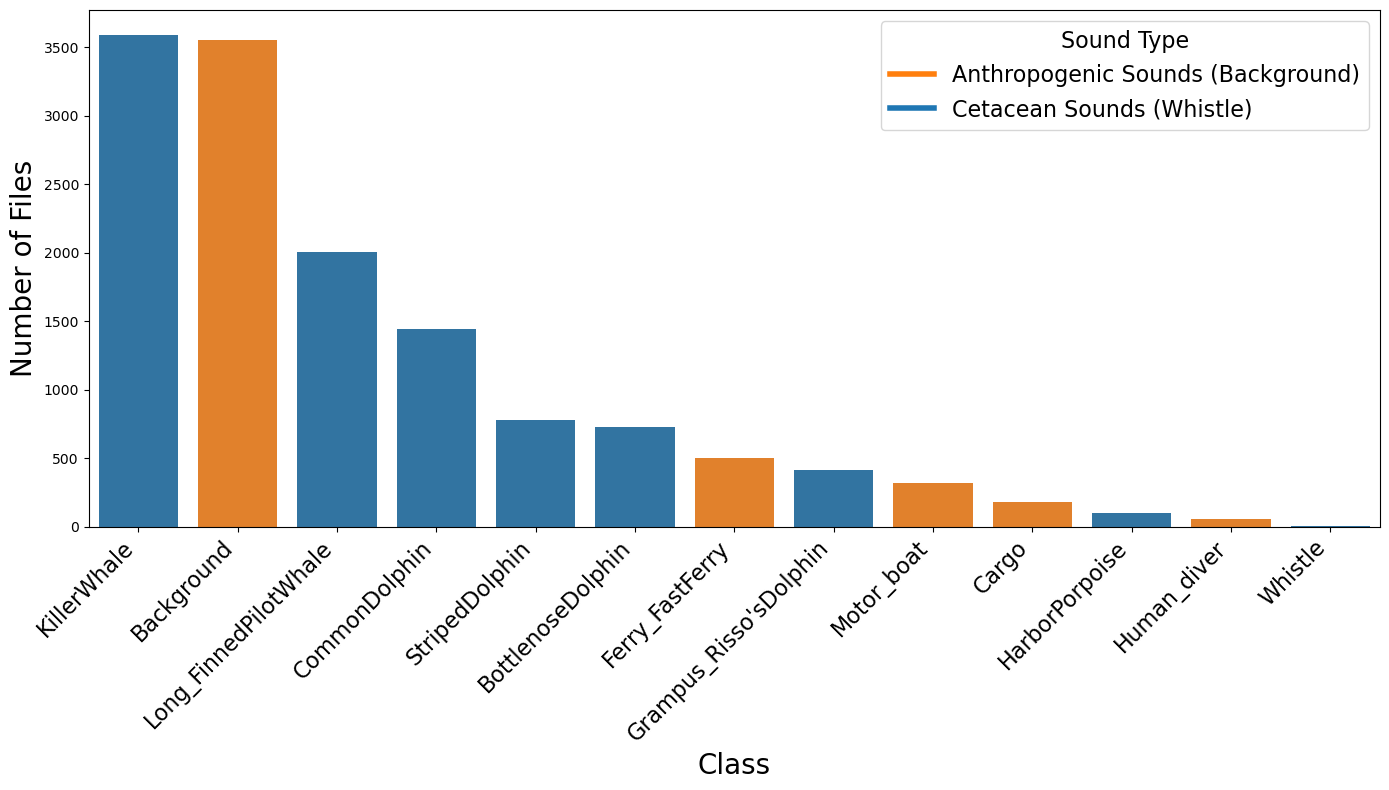

/tmp/ipykernel_985264/1490470257.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_duration.index, y=df_duration.values, palette=custom_palette)


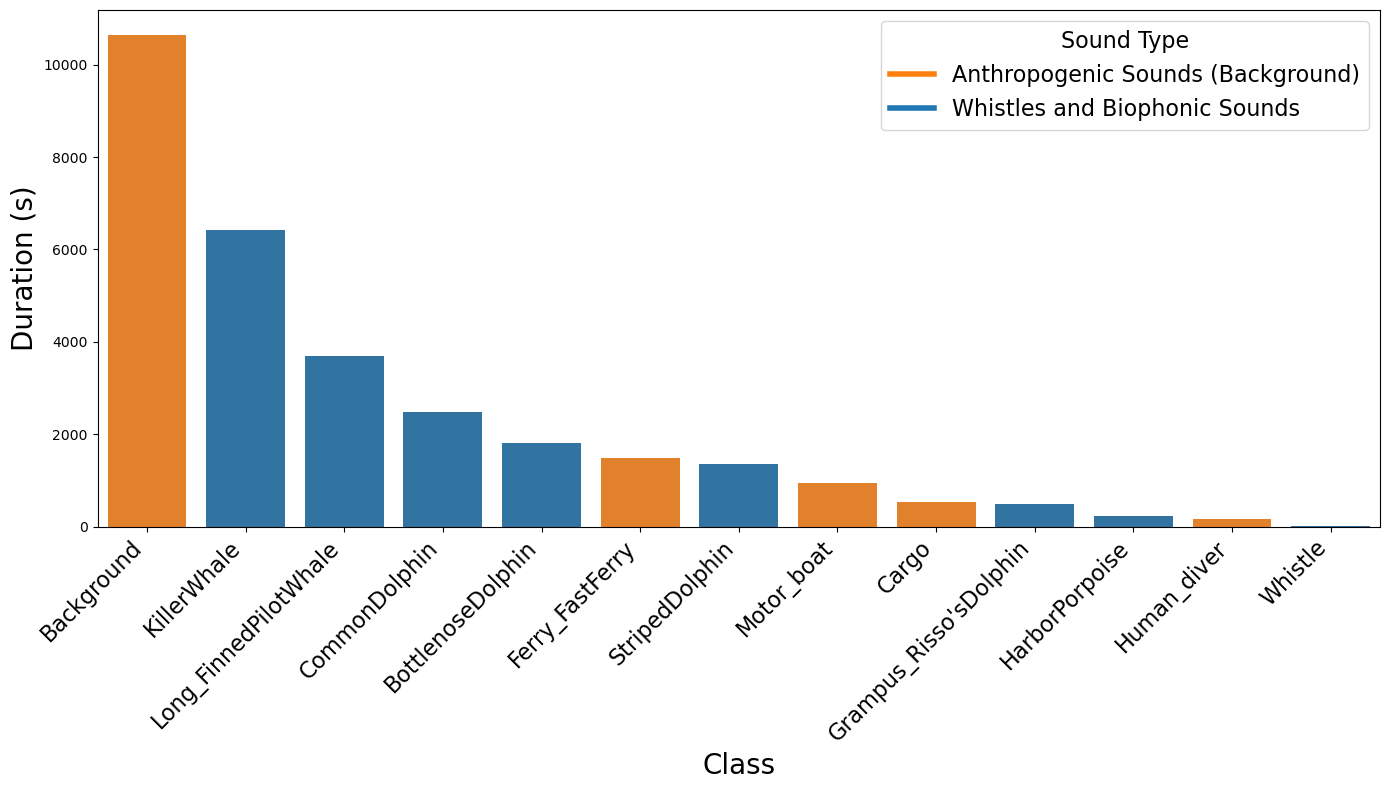

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
custom_palette = {
    'Ferry_FastFerry': 'C1',
    'Motor_boat': 'C1',
    'Cargo': 'C1',
    'Human_diver': 'C1',
    'Background': 'C1',
    'KillerWhale': 'C0',
    'Long_FinnedPilotWhale': 'C0',
    'CommonDolphin': 'C0',
    'StripedDolphin': 'C0',
    'BottlenoseDolphin': 'C0',
    "Grampus_Risso'sDolphin": 'C0',
    'HarborPorpoise': 'C0',
    'Whistle': 'C0'
}

# Plot count per class, each subset is a bar for each class (train, val and test)
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Class', order=class_counts.index, palette=custom_palette)
plt.xticks(rotation=45, ha='right', fontsize=16)  # Adjust fontsize and alignment
plt.legend(handles=[
    plt.Line2D([0], [0], color='C1', lw=4, label='Anthropogenic Sounds (Background)'),
    plt.Line2D([0], [0], color='C0', lw=4, label='Cetacean Sounds (Whistle)')
], title='Sound Type', fontsize=16, title_fontsize='16')
plt.ylabel('Number of Files', fontsize=20)
plt.xlabel('Class', fontsize=20)
plt.tight_layout()  # Adjust layout to make room for labels

# save as pdf
plt.savefig('../../Figures/Count_per_class.pdf')

plt.show()

# Show Sum of Duration per class
df_duration = df.groupby('Class')['Duration'].sum().sort_values(ascending=False)

# Plot sum of duration per class
plt.figure(figsize=(14, 8))
sns.barplot(x=df_duration.index, y=df_duration.values, palette=custom_palette)
plt.xticks(rotation=45, ha='right', fontsize=16)  # Adjust fontsize and alignment
plt.legend(handles=[
    plt.Line2D([0], [0], color='C1', lw=4, label='Anthropogenic Sounds (Background)'),
    plt.Line2D([0], [0], color='C0', lw=4, label='Whistles and Biophonic Sounds')
], title='Sound Type', fontsize=16, title_fontsize='16')
plt.ylabel('Duration (s)', fontsize=20)
plt.xlabel('Class', fontsize=20)
plt.tight_layout()  # Adjust layout to make room for labels

# save as pdf in Figures
plt.savefig('../../Figures/Duration_per_class.pdf')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


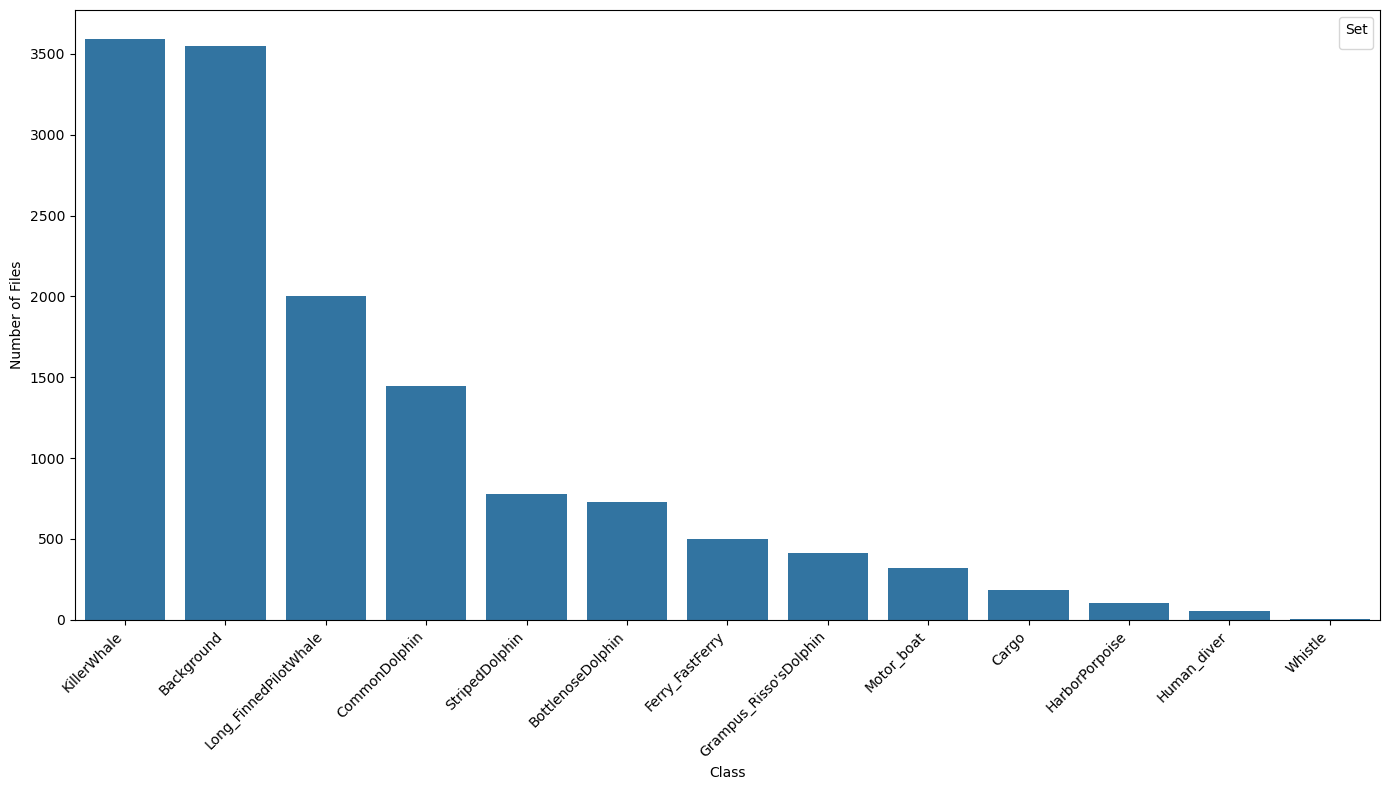

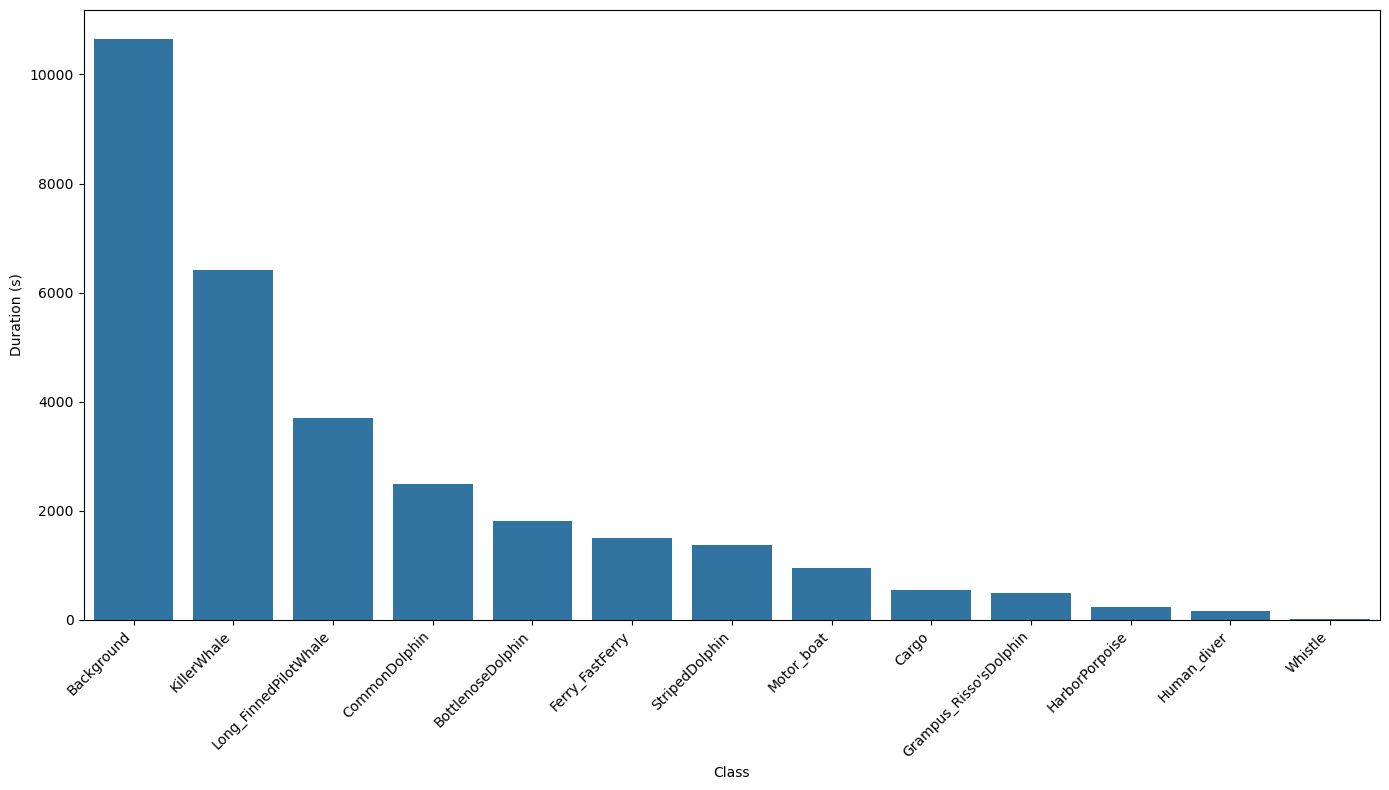

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count per class, each subset is a bar for each class (train, val and test)
class_counts = df['Class'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Class', order=class_counts.index)
# plt.title('Number of Files per Class in Each Set')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize and alignment
plt.legend(title='Set')
plt.ylabel('Number of Files')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

# Show Sum of Duration per class
df_duration = df.groupby('Class')['Duration'].sum().sort_values(ascending=False)

# Plot sum of duration per class
plt.figure(figsize=(14, 8))
sns.barplot(x=df_duration.index, y=df_duration.values)
# plt.title('Sum of Duration per Class')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize and alignment
plt.ylabel('Duration (s)')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

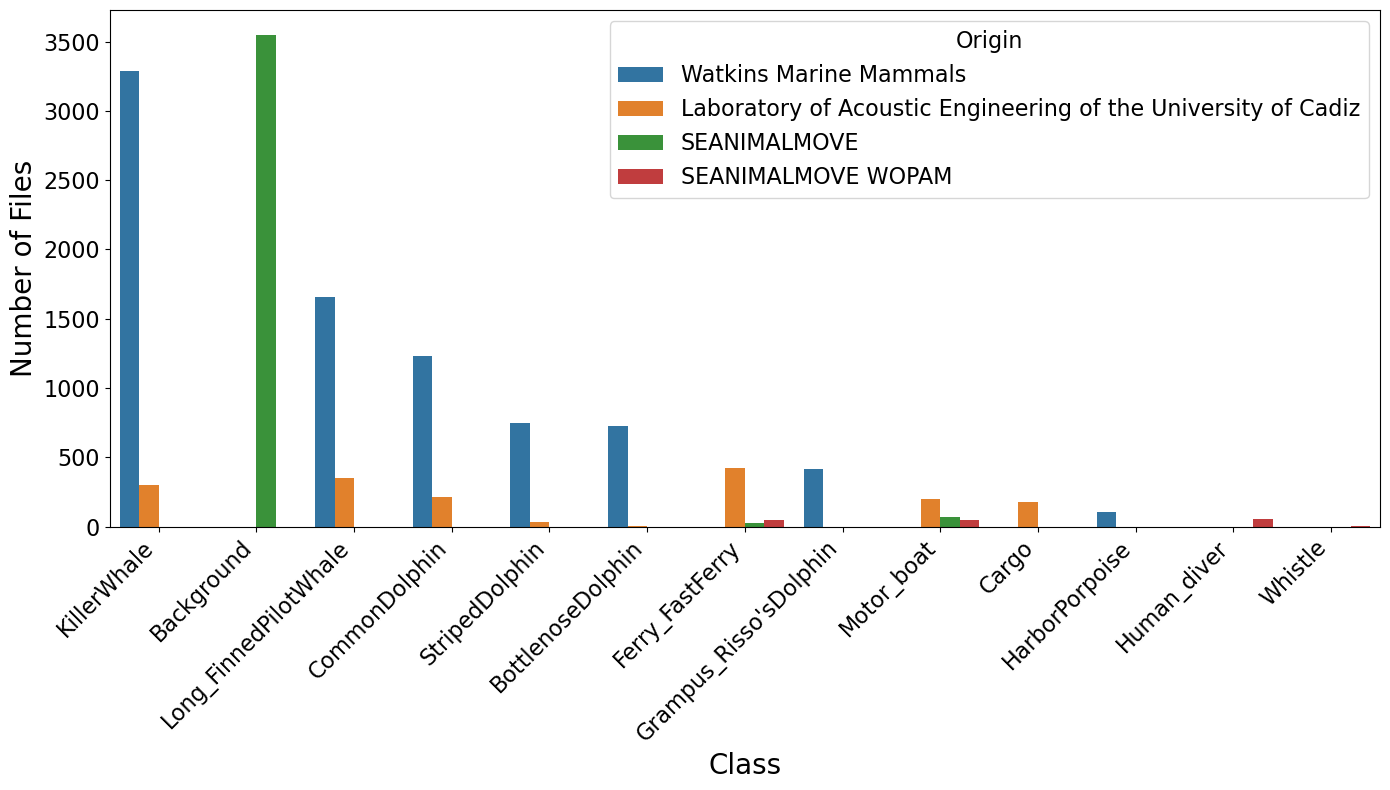

In [30]:
# change origin Neus Background Fast Ferry to Laboratory of Acoustic Engineering of the University of Cadiz
df.loc[df['Origin'] == 'Neus Background Fast Ferries', 'Origin'] = 'Laboratory of Acoustic Engineering of the University of Cadiz'
# Change Neus Marine Mammals to Laboratory of Acoustic Engineering of the University of Cadiz
df.loc[df['Origin'] == 'Neus Marine Mammals', 'Origin'] = 'Laboratory of Acoustic Engineering of the University of Cadiz'
# change SEANIMALMOVE Background NOWOPAM Day to SEANIMALMOVE
df.loc[df['Origin'] == 'SEANIMALMOVE Background NOWOPAM Day', 'Origin'] = 'SEANIMALMOVE'
# change SEANIMALMOVE WOPAM Day to SEANIMALMOVE WOPAM
df.loc[df['Origin'] == 'SEANIMALMOVE WOPAM Day', 'Origin'] = 'SEANIMALMOVE WOPAM'
# change CIRCE Marine Mammals to Laboratory of Acoustic Engineering of the University of Cadiz
df.loc[df['Origin'] == 'CIRCE Marine Mammals', 'Origin'] = 'Laboratory of Acoustic Engineering of the University of Cadiz'
# change CIRCE Background Fast Ferries to Laboratory of Acoustic Engineering of the University of Cadiz
df.loc[df['Origin'] == 'CIRCE Background Fast Ferries', 'Origin'] = 'Laboratory of Acoustic Engineering of the University of Cadiz'

# Create a plot to see the proportion of each Origin in each class and subset
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Class', hue='Origin', order=class_counts.index)
# plt.title('Number of Files per Class in Each Set')
plt.xticks(rotation=45, ha='right', fontsize=16)  # Adjust fontsize and alignment
plt.yticks(fontsize=16)
plt.legend(title='Origin', fontsize=16, title_fontsize='16')
plt.ylabel('Number of Files', fontsize=20)
plt.xlabel('Class', fontsize=20)
plt.tight_layout()  # Adjust layout to make room for labels

plt.savefig('../../Figures/Count_per_class_origin.pdf')

plt.show()

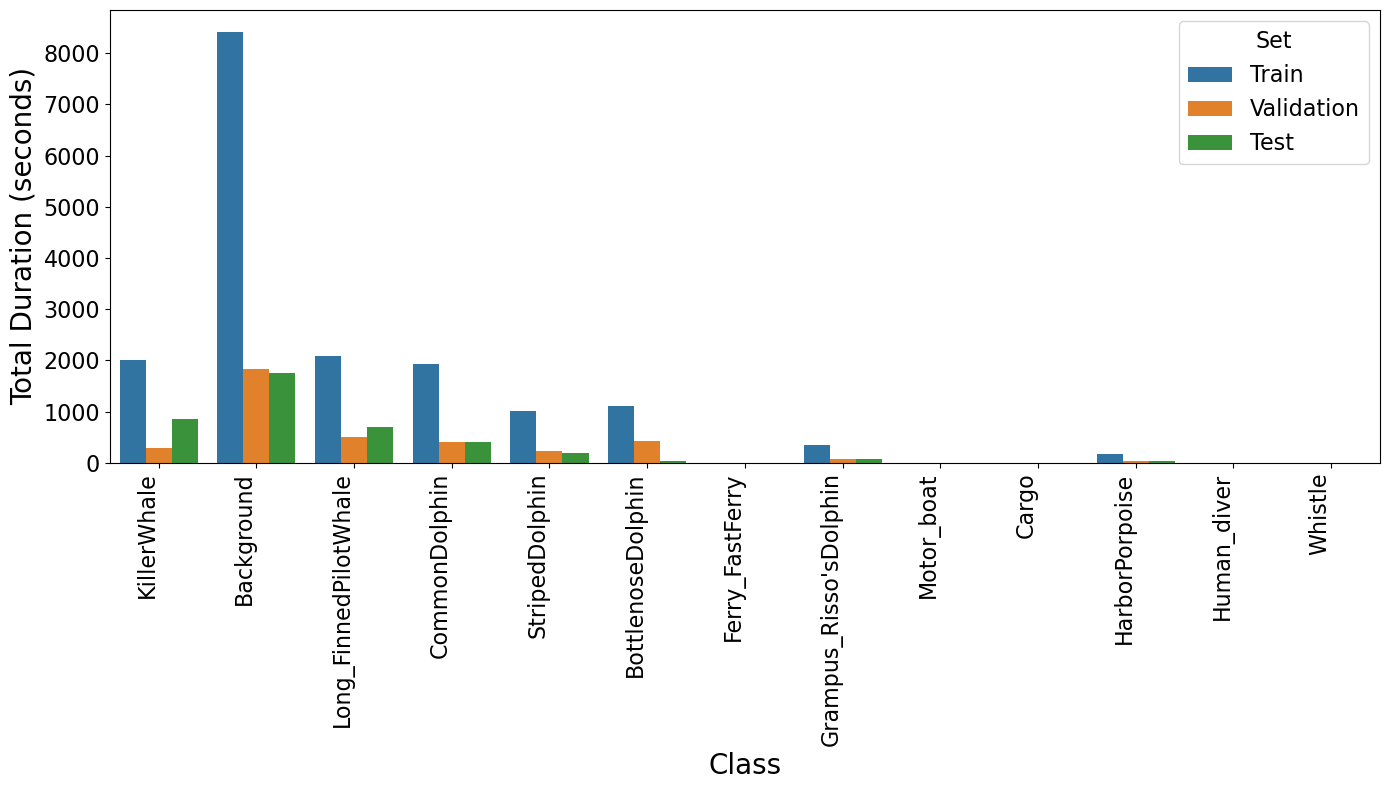

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('../../Dataset/CSVs/Datasets/Train.csv')
df_val = pd.read_csv('../../Dataset/CSVs/Datasets/Validation.csv')
df_test = pd.read_csv('../../Dataset/CSVs/Datasets/Test.csv')

# Add 'Set' column
df_train['Set'] = 'Train'
df_val['Set'] = 'Validation'
df_test['Set'] = 'Test'

# Concatenate all dataframes
df = pd.concat([df_train, df_val, df_test])

# Aggregate total duration per class and subset
duration_df = df.groupby(['Class', 'Set'])['Duration'].sum().reset_index()

# Ensure the order of the bars is Train, Validation, and Test
duration_df['Set'] = pd.Categorical(duration_df['Set'], categories=['Train', 'Validation', 'Test'], ordered=True)

# Plot the total duration per class and subset
plt.figure(figsize=(14, 8))
sns.barplot(data=duration_df, x='Class', y='Duration', hue='Set', order=class_counts.index)
# plt.title('Total Duration per Class in Each Set')
plt.xticks(rotation=90, ha='right', fontsize=16)  # Adjust fontsize and alignment
plt.yticks(fontsize=16)
plt.ylabel('Total Duration (seconds)', fontsize=20)
plt.xlabel('Class', fontsize=20)
plt.legend(title='Set', fontsize=16, title_fontsize='16')
plt.tight_layout()  # Adjust layout to make room for labels

#save as pdf
plt.savefig('../../Figures/Duration_per_class_set.pdf')

plt.show()

In [ ]:
# reset index in all sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
CLASSES_MAPPING

{'Background': 0,
 'BottlenoseDolphin': 1,
 'CommonDolphin': 2,
 'Fin_FinbackWhale': 3,
 "Grampus_Risso'sDolphin": 4,
 'HarborPorpoise': 5,
 'HumpbackWhale': 6,
 'KillerWhale': 7,
 'Long_FinnedPilotWhale': 8,
 'MinkeWhale': 9,
 'SpermWhale': 10,
 'StripedDolphin': 11}

## Elena Papale - Test

In [8]:
# Main Folder with all classes and files
main_folder = '../../Dataset/Audios/ElenaPapale/'

# Folder contains subfolders = classes and in them, the audio sample
classes = os.listdir(main_folder)

# remove folder Segmented
# classes.remove('Segmented')

# delete README.MD
# classes.remove('README.MD')

# Create an empty list to store the audio file paths
audio_files = []

# Loop through all the subfolders and files
for subfolder in classes:
    # Get the list of all files in the subfolder
    files = os.listdir(main_folder + subfolder)
    # Loop through all the files
    for f in files:
        # Get the full path of the file
        audio_files.append(main_folder + subfolder + '/' + f)

df_elena_fb = pd.DataFrame(audio_files, columns=['File'])

# Add class
df_elena_fb['Class'] = df_elena_fb['File'].apply(lambda x: x.split('/')[-2])

# Number of files per class and duration of each file
for f in audio_files:
    # Load the audio file
    x, sr = librosa.load(f)
    # Duration of the audio file
    duration = librosa.get_duration(y=x, sr=sr)
    # Add the duration to the duration list
    df_elena_fb.loc[df_elena_fb['File'] == f, 'Duration'] = duration

In [9]:
df_elena_fb

,File,Class,Duration
0,../../Dataset/Audios/ElenaPapale/Fin_FinbackWh...,Fin_FinbackWhale,1798.006032
1,../../Dataset/Audios/ElenaPapale/Fin_FinbackWh...,Fin_FinbackWhale,1798.006032


In [12]:
# For each file in the dataset, process the audio segmenting it in 3 seconds windows, if any of the segments is shorter, save it if it is at least 0.2 second long
# Create a new dataframe with the processed files maintaining original FilePath, Class, Subset, and Duration and include SegmentPath
processed_files = []
# target_sr = 48000
duration = 3
min_duration = 2

# Define the segments to keep for each file
segments_to_keep = {
    'us500HzMS16-ISCHIA_20160819_080004.wav': [
        (1*60+36, 1*60+55),  # 1:36 to 1:55
        (3*60+5, 4*60+40)  # 3:05 to 4:40
    ],
    'us500HzMS16-ISCHIA_20160819_083004.wav': [
        (6*60+3, 11*60+50),  # 6:03 to 11:50
        (24*60+40, 27*60+50)  # 24:40 to 27:50
    ]
}

# Define the subsets for each segment
subsets = {
    'us500HzMS16-ISCHIA_20160819_080004.wav': 'train',
    'us500HzMS16-ISCHIA_20160819_083004.wav': ['test', 'validation']
}

for _, row in df_elena_fb.iterrows():
    # Load audio
    file_path = row["File"]
    base_filename = os.path.basename(file_path)
    if base_filename not in segments_to_keep:
        continue

    audio, audio_sr = librosa.load(file_path, sr=None)
    max_length = audio_sr * duration
    min_length = audio_sr * min_duration

    for i, (start_sec, end_sec) in enumerate(segments_to_keep[base_filename]):
        start_sample = int(start_sec * audio_sr)
        end_sample = int(end_sec * audio_sr)
        segment = audio[start_sample:end_sample]

        audio_class = row['Class']
        class_folder = "../../Dataset/Audios/ElenaPapale/Segmented/" + audio_class
        os.makedirs(class_folder, exist_ok=True)

        for seg_start in range(0, len(segment), max_length):
            seg_end = seg_start + max_length
            seg = segment[seg_start:seg_end]

            if min_length <= len(seg) <= max_length:
                seg_start_second = start_second + (seg_start / audio_sr)
                seg_end_second = start_second + (seg_end / audio_sr)
                seg_end_second = round(seg_end_second, 2)

                seg_path = row["File"].split("ElenaPapale")[0] + "ElenaPapale/Segmented/" + audio_class + "/"
                seg_path += base_filename.replace(".wav", f"_{seg_start_second}_{seg_end_second}.wav")
                sf.write(seg_path, seg, audio_sr)

                subset = subsets[base_filename]
                if isinstance(subset, list):
                    subset = subset[i]

                processed_files.append({
                    "FilePath": row["File"],
                    "SegmentPath": seg_path,
                    "Class": row["Class"],
                    "Duration": len(seg) / audio_sr,
                    "Origin": "ElenaPapale Fin Finback Whale",
                    "Subset": subset
                })

df_processed_neus = pd.DataFrame(processed_files)

# save as CSV in CSV folder
df_processed_neus.to_csv("../../Dataset/CSVs/Datasets/ElenaPapaleFinfinbackWhaleSegmented.csv", index=False)
